In [2]:
from train import *
from model import *
from data_process import *
from resnet50 import *
%matplotlib inline

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片

2 uint8 (5106, 15106)


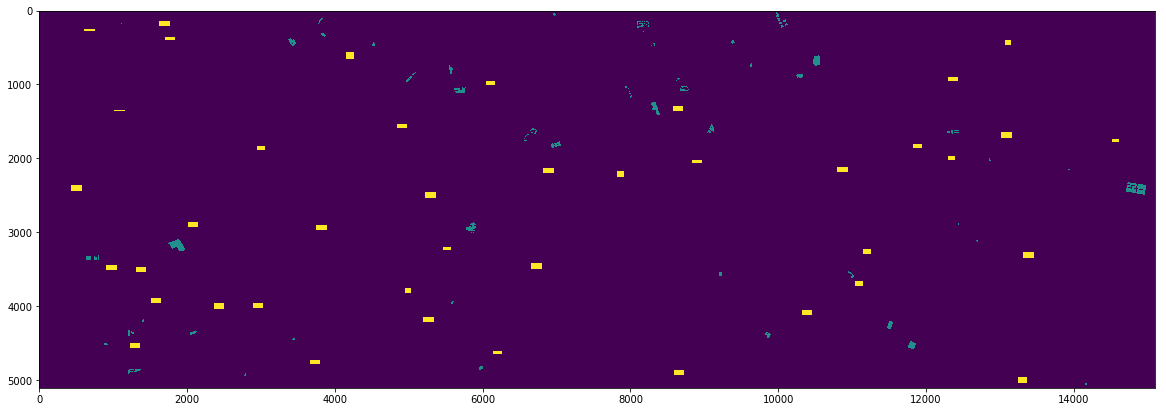

In [3]:
label = tiff.imread('./answer_complete.tif')
print label.max(),label.dtype,label.shape
plt.figure(figsize=(20,16))
plt.imshow(label)
plt.show()

(5106, 15106)


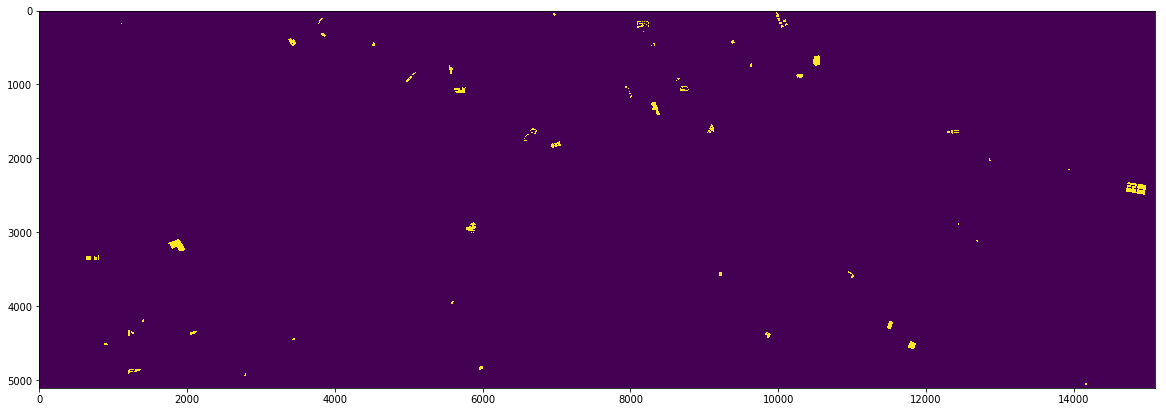

In [4]:
label1 = (label==1).astype(np.uint8)
print label1.shape
plt.figure(figsize=(20,16))
plt.imshow(label1)
plt.show()


1 uint8 (3000, 15106) 0.0381466746105


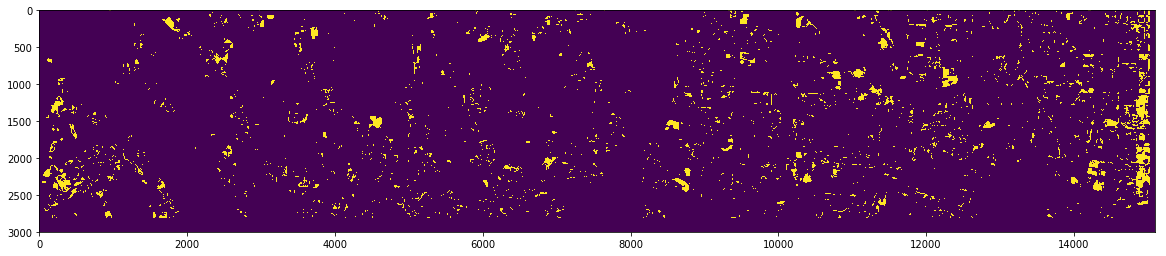

In [13]:
result = tiff.imread('./submit.tiff')
print result.max(),result.dtype,result.shape,result.mean()
plt.figure(figsize=(20,16))
plt.imshow(result)
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x13ee05bd0>,
 <matplotlib.image.AxesImage at 0x13eeffa90>)

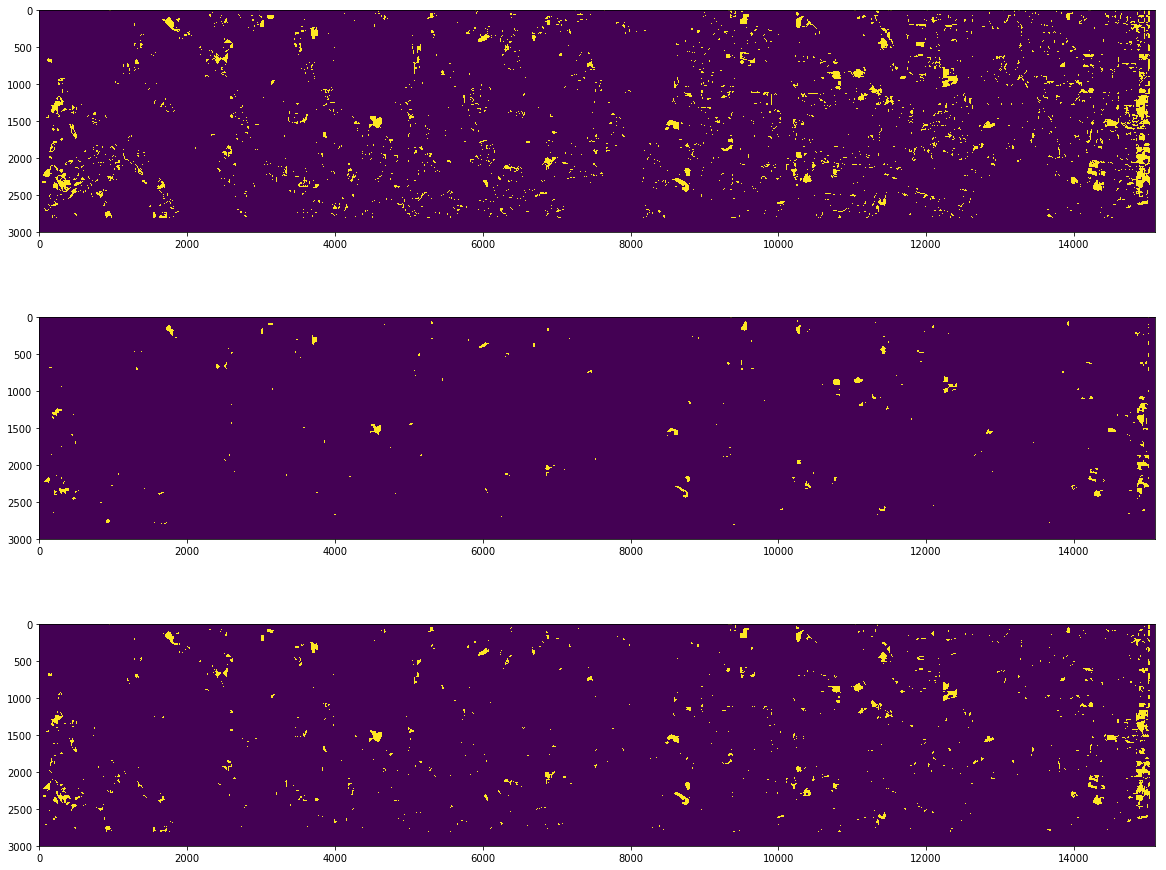

In [14]:
kernel = np.ones((20,20),np.uint8) 
erosion = cv2.erode(result,kernel,1) 
kernel1 = np.ones((10,5),np.uint8) 
erosion1 = cv2.erode(result,kernel1,1) 
plt.figure(figsize=(20,16)) 
plt.subplot(3,1,1),plt.imshow(result) 
plt.subplot(3,1,2),plt.imshow(erosion) 
plt.subplot(3,1,3),plt.imshow(erosion1)

In [15]:
tiff.imsave('./submit_erode.tiff',erosion.astype(np.uint8))
tiff.imsave('./submit_erode1.tiff',erosion1.astype(np.uint8))

1 uint8 (3000, 15106) 0.0327846109714


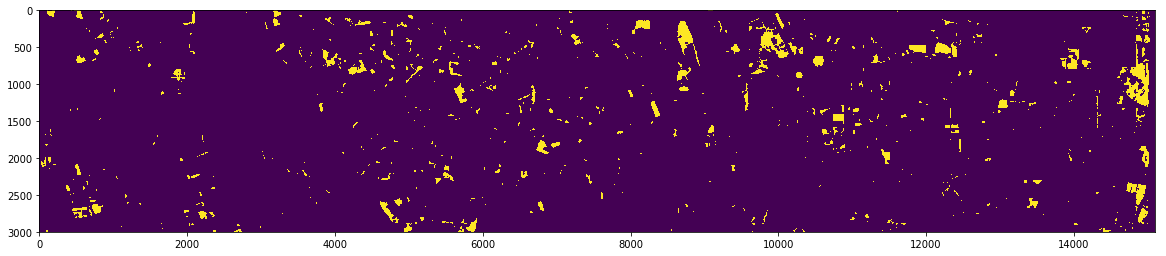

In [11]:
a = tiff.imread('./submit_erode.tiff')
print a.max(),a.dtype,a.shape,a.mean()
plt.figure(figsize=(20,16))
plt.imshow(a)
plt.show()

In [24]:
def scale_percentile(matrix):
    """
    图像中心化
    :param matrix:
    :return:
    """

    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    matrix = (matrix - mins[None, :]) / maxs[None, :]
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix

(5106, 15106, 4)


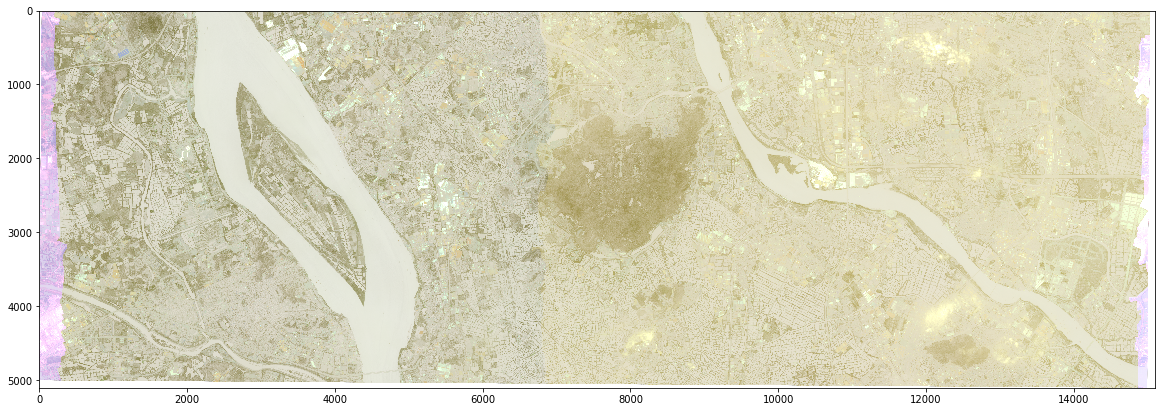

(3000, 15106, 4)


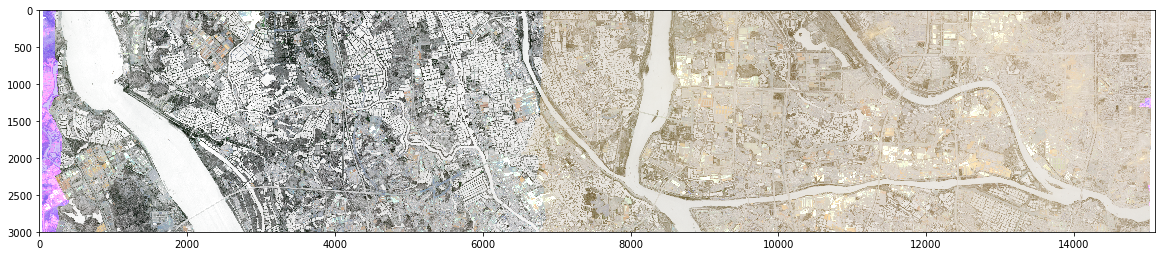

In [6]:
submit = tiff.imread('../land/data/preliminary/quickbird2015.tif').transpose([1, 2, 0])
print submit.shape
plt.figure(figsize=(20,16))
plt.imshow(scale_percentile(submit))
plt.show()
img_2015 = tiff.imread('./quickbird2015_preliminary_2.tif').transpose([1,2,0])
print img_2015.shape
plt.figure(figsize=(20,16))
plt.imshow(scale_percentile(img_2015[:,:,:]))
plt.show()

(3000, 15106, 4)


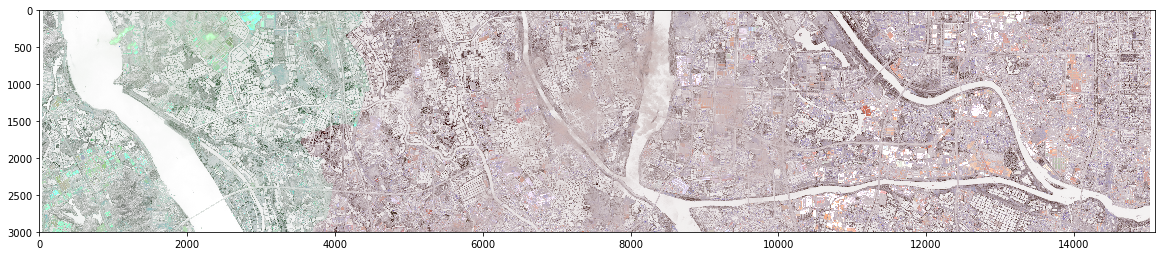

In [9]:
img_2017 = tiff.imread('./quickbird2017_preliminary_2.tif').transpose([1,2,0])
print img_2017.shape
plt.figure(figsize=(20,16))
plt.imshow(scale_percentile(img_2017[:,:,:]))
plt.show()

In [59]:
def my_f1(y_true,y_pred):
    flag = y_true>0
    pred = y_pred[flag]
    true = y_true[flag]-1
    return f1_score(true, pred)

1 uint8 (5106, 15106) 0.0533007146417


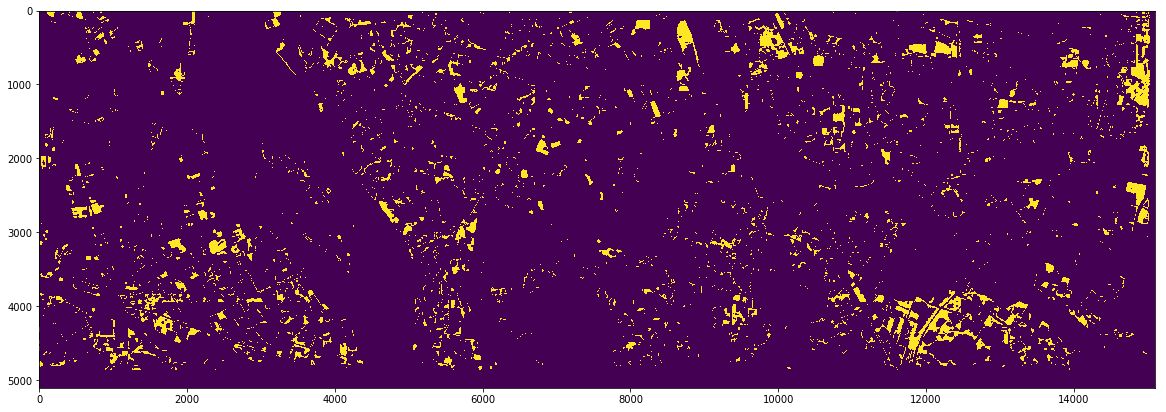

In [58]:
pred = tiff.imread('/Users/sunwill/Desktop/submit_preliminary_1.tiff')
print pred.max(),pred.dtype,pred.shape,pred.mean()
plt.figure(figsize=(20,16))
plt.imshow(pred)
plt.show()

In [60]:
pred_erode = cv2.erode(pred,kernel,1)

In [61]:
print my_f1(label,pred)
print my_f1(label,pred_erode)

0.0692551383239
0.0218971963959


1 uint8 (5106, 15106) 0.0231587239183


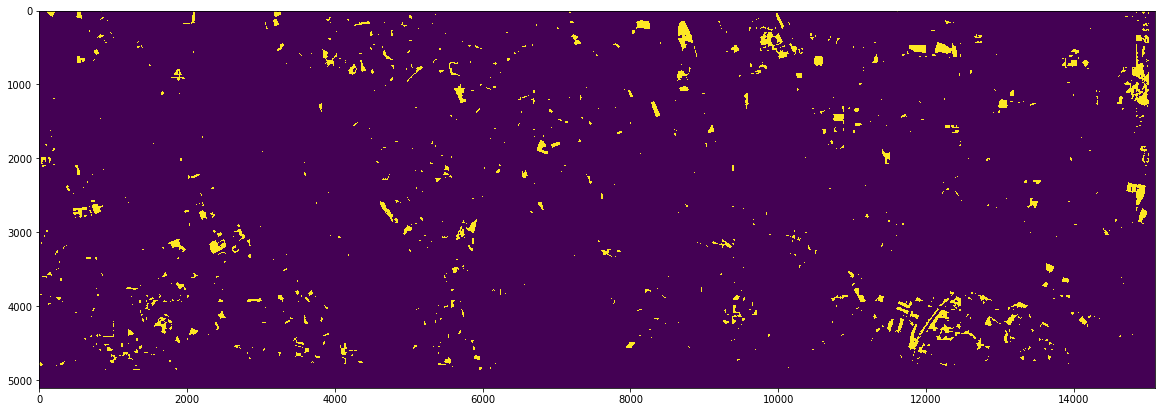

In [50]:
print pred_erode.max(),pred_erode.dtype,pred_erode.shape,pred_erode.mean()
plt.figure(figsize=(20,16))
plt.imshow(pred_erode)
plt.show()

In [64]:
(label[label>0]-1).min()

0